# Image Classification With CIFAR-10

## Step 1: Import Libraries and Datasets

In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn

In [47]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image Classes (60,000 total):
0: airplanes

1: cars

2: birds

3: cats

4: deer

5: dogs

6: frogs

7: horses

8: ships

9: trucks

In [48]:
X_train.shape
# (observations, image_height, image_width, color_channels)

(50000, 32, 32, 3)

In [49]:
X_test.shape

(10000, 32, 32, 3)

In [50]:
y_train.shape
# (observations, image_label)

(50000, 1)

In [51]:
y_test.shape

(10000, 1)

## Step 2: Visualize the Dataset

[1]


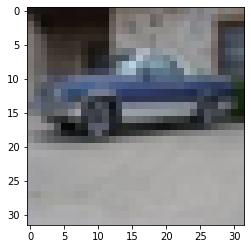

In [52]:
i = 10000
plt.imshow(X_train[i])
print(y_train[i]) # printing the number value associate with image label, so 1 = cars

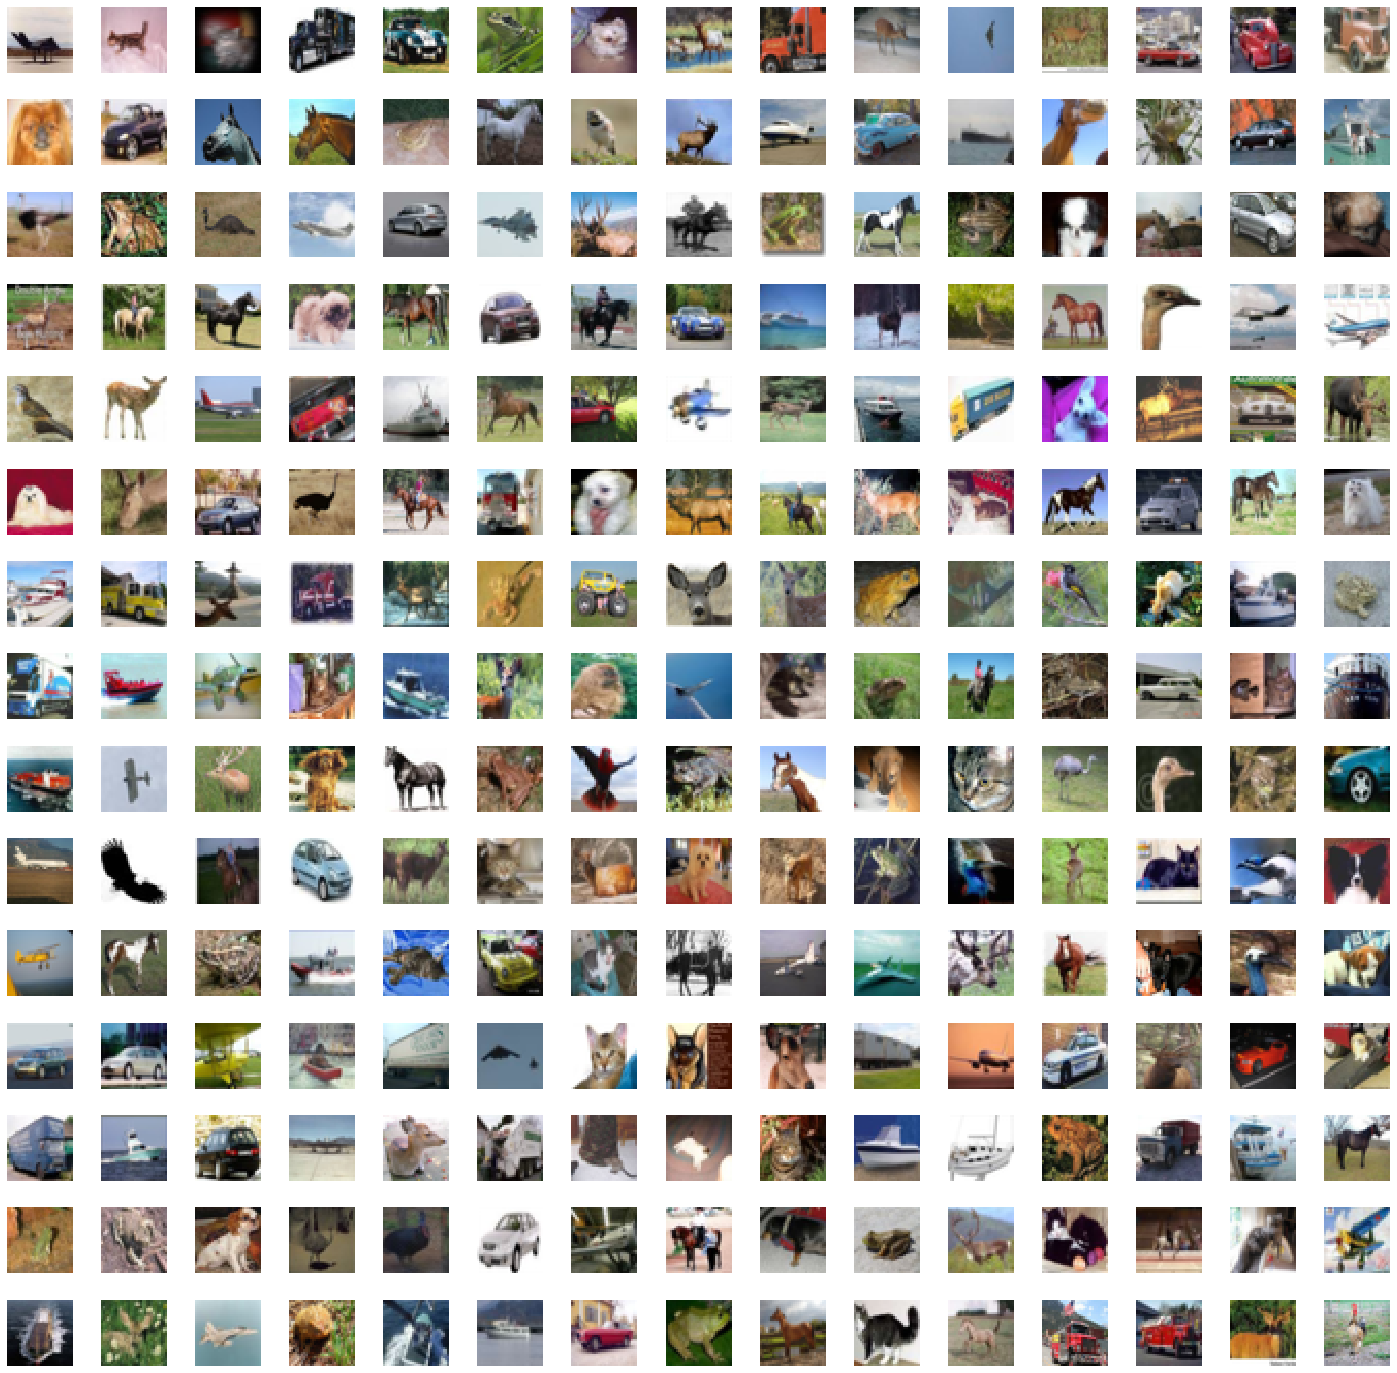

In [53]:
# 15 cells by 15 cells 
W_grid = 15 
L_grid = 15 

# create a grid 
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
# takes array of arrays and turns into one single array
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    #axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [54]:
n_training

50000

## Step 3: Data Preparation

In [55]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [56]:
number_categories = 10

In [57]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [58]:
import keras
y_train = keras.utils.to_categorical(y_train, number_categories)

In [59]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
y_test = keras.utils.to_categorical(y_test, number_categories)

In [61]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [62]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

#### Normalizing the training and test data by dividing it with 255 (255 is the max value for a pixel) to get value ranges for each observation between 0 and 1

In [63]:
X_train = X_train / 255
X_test = X_test / 255

In [64]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [65]:
X_train.shape

(50000, 32, 32, 3)

In [66]:
Input_shape = X_train.shape[1:]

In [67]:
Input_shape

(32, 32, 3)

## Step 4: Train the Model 

In [68]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [69]:
# creating model then adding the layers 
# 1st convolutional layer
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

# 2nd convolutional layer 
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

# flattening 
cnn_model.add(Flatten())

# Neural Network Hidden Layer(s) 
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))

# Output Layer (gives us our classification)
cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [70]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics = ['accuracy'])

In [71]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
50000/50000 [==============================] - 121s 2ms/step - loss: 1.5632 - accuracy: 0.4359
Epoch 2/2
50000/50000 [==============================] - 128s 3ms/step - loss: 1.1366 - accuracy: 0.6008
